In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=2
paper='2110.11330'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Let me analyze the Hamiltonian equation step by step to build the Hartree-Fock Hamiltonian class.

The Hamiltonian has the following parts:
1. Non-interacting part: $H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$
2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
3. Fock term: $H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

Let's start with Question 1: Determining the dimension and basis order.

Looking at the operators in the Hamiltonian:
- $c_{\bm{k},s}^\dagger$ and $c_{\bm{k},s}$: These are creation and annihilation operators for particles with momentum $\bm{k}$ and spin $s$.

The index $s$ appears to be a spin index, which typically takes values up or down (or equivalently, +1/2 and -1/2). Since there are no other indices beyond

In [7]:
print(generated_code['thinking'])

Let me analyze the Hamiltonian equation step by step to build the Hartree-Fock Hamiltonian class.

The Hamiltonian has the following parts:
1. Non-interacting part: $H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$
2. Hartree term: $H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$
3. Fock term: $H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s} $

Let's start with Question 1: Determining the dimension and basis order.

Looking at the operators in the Hamiltonian:
- $c_{\bm{k},s}^\dagger$ and $c_{\bm{k},s}$: These are creation and annihilation operators for particles with momentum $\bm{k}$ and spin $s$.

The index $s$ appears to be a spin index, which typically takes values up or down (or equivalently, +1/2 and -1/2). Since there are no other indices beyond momentum $\bm{k}$ and spin $s$, we can determine tha

In [8]:
print(generated_code['text'])

# Answer

## 1) Number of Flavors, D = (2,)
Basis Order:
0: spin. Order: up, down

The Hamiltonian deals with creation and annihilation operators $c_{\bm{k},s}^\dagger$ and $c_{\bm{k},s}$ where $s$ is the spin index (up/down). There are no other indices apart from momentum $\bm{k}$, so we have a single flavor dimension with 2 values.

## 2) EXP-VAL DEPENDENT TERMS: 
```
\langle c_{k,s}^\dagger c_{k,s}\rangle: "Mean density of spin s"
\langle c_{k,s}^\dagger c_{k,s'} \rangle: "Spin-flip correlation between s and s'"
```

TERMS:
- $-\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$ -> H[s, s, k], NI (Non-interacting term)
- $\frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$ -> H[s', s', k'], I (Hartree term)
- $-\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s}$ -> H[s', s, q], I (Fock term)

## 3) CODE:

```python
import numpy as np
from typing import Any

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
  """
  Hartree-Fock Hamiltonian for a spin-1/2 system on a triangular lattice.
  
  The Hamiltonian includes:
  - Non-interacting dispersion term: -∑_s ∑_k E_s(k) c^†_ks c_ks
  - Hartree term: (1/N) ∑_s,s' ∑_k,k' U(0) <c^†_ks c_ks> c^†_k's' c_k's'
  - Fock term: -(1/N) ∑_s,s' ∑_k,q U(k-q) <c^†_ks c_ks'> c^†_qs' c_qs
  
  Args:
    N_shell: Number of shells in k-space
    parameters: Dictionary of model parameters
    filling_factor: Filling factor of the system
  """
  def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
    self.lattice = 'triangular'
    self.D = (2,)  # Dimension for spin (up, down)
    self.basis_order = {'0': 'spin'}  # 0: up, 1: down
    
    # Occupancy parameters
    self.nu = filling_factor
    self.T = parameters.get('T', 0.0)  # Temperature
    self.a = parameters.get('a', 1.0)  # Lattice constant
    self.primitive_vectors = get_

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2110_11330_2.py


# Code evaluation

In [4]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [5]:
import importlib

In [6]:
module = importlib.import_module(code_path)

In [7]:
import HF

## Task 1: Check k-space

In [8]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

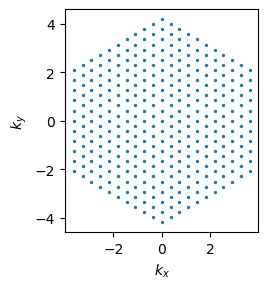

In [9]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [10]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [11]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [12]:
h_nonint = ham.generate_non_interacting()

In [13]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

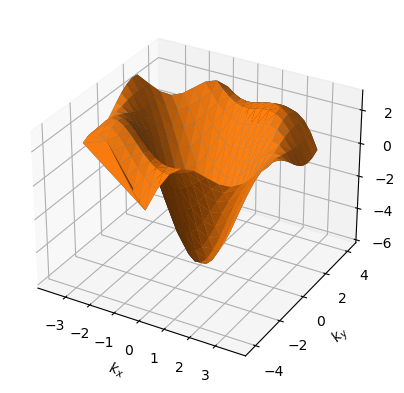

In [14]:
utils_auto.plot_2d_bandstructure(ham,en)

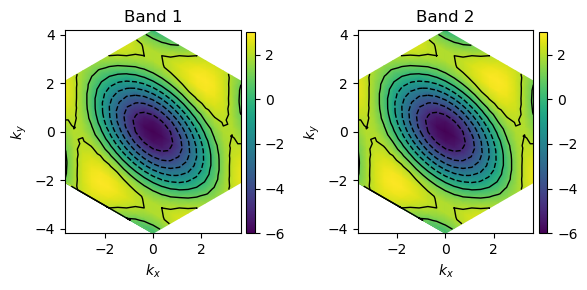

In [15]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [16]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [17]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [18]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 0


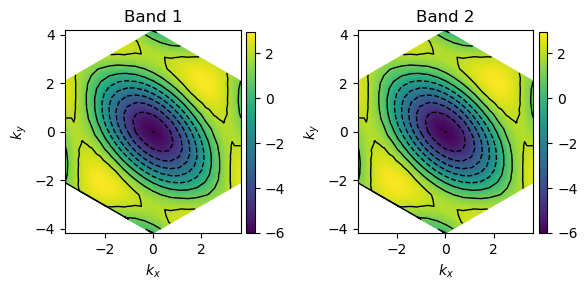

In [19]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit + Large T limit (T=U)i

In [20]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)
setattr(ham_int,'T',1e5/1.8)


In [21]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [22]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 19


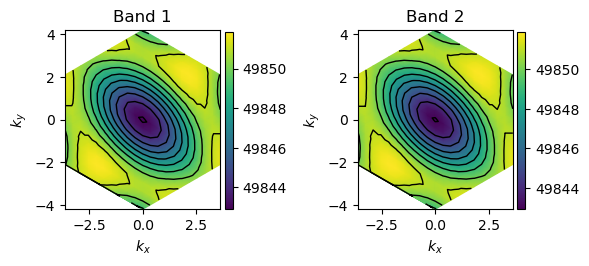

In [23]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [24]:
utils_auto.print_gap(ham_int,exp_val,en_int,1)

Gap is -8.94
U/T is 25266.01
mean_U is 24999.80


# Auto eval

## Task 1

In [25]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

In this problem,
In this problem, I'm asked to analyze an image that shows a momentum space mesh in the first Brillouin zone for a triangular lattice system. The Hamiltonian is given in the second quantized form, and I need to check if the image satisfies the requirements in the rubric.

Let's analyze the image first:
- The image shows a hexagonal pattern of points in momentum (k) space, with kx on the x-axis and ky on the y-axis.
- The points are distributed uniformly in a hexagonal shape, which is characteristic of the first Brillouin zone of a triangular lattice.
- The range of kx appears to be from approximately -3 to 3, and ky appears to be in a similar range.

Now let's check the rubric points:

1. **Momentum space mesh in the first Brillouin zone**:
   - For a triangular lattice, the first Brillouin zone is a hexagon in reciprocal space.
   - The image indeed shows a hexagonal arrangement of k-points, which is consistent with 

In [26]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [27]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me
Let me analyze the image and compare it with the rubric to determine whether this is a correct representation of the non-interacting band structure for a triangular lattice system.

The image shows two plots labeled "Band 1" and "Band 2", which appear to be false color plots with contour lines representing energy levels in k-space (momentum space). The color scale on the right indicates that purple/blue represents lowest energies (around -6) and yellow represents highest energies (around 2).

Let's go through the rubric point by point:

1. **Brillouin zone shape**:
   - The Brillouin zone boundary in the plots appears to be hexagonal, which is indeed the expected shape for a triangular lattice. The plots show a region from approximately -4 to 4 in both kx and ky directions, with a hexagonal boundary.
   - This matches what we expect for a triangular lattice, so this point is correct.

2. **Symmetry of the energy distribution**

In [28]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [34]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze the
Let me analyze the image and evaluate it according to the given rubric:

The image shows two plots labeled "Band 1" and "Band 2", which appear to be false color plots of energy bands in the first Brillouin zone after a self-consistent Hartree-Fock calculation for a triangular lattice system.

Going through the rubric point by point:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

In the image, I can see that the Brillouin zone has a hexagonal shape, which is indeed what's expected for a triangular lattice. The hexagonal boundary is clearly visible in both Band 1 and Band 2 plots. So this point is correct.

2. Next, examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow)
The highest energy regions (shown in yellow) appear to be at the corners of the hexagon in both B

In [35]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [36]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int='U=1e5 and T=1e5/1.8, so the gap should smear to 0'
    ))


#################### THINKING ####################

Let me analyze the
Let me analyze the image according to the provided rubric:

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice:
   - The image shows hexagonal Brillouin zones for both Band 1 and Band 2, which is indeed the expected shape for a triangular lattice in reciprocal space. This appears correct.

2. Examine the symmetry of the energy distribution shown by the false color plot:

   2.1 Identify the highest energy regions (yellow):
   - The highest energy regions (yellow) appear at the corners of the hexagonal Brillouin zone.
   
   2.2 Trace the pattern of energy variation across the zone:
   - The energy varies from highest (yellow) at the corners to lowest (purple/dark blue) at the center of the Brillouin zone. The contour lines form concentric elliptical shapes around the center.
   
   2.3 Determine what rotational and mirror symmetries are presen

In [37]:
answer4=utils_auto.extract_result_content(result4['text'])

In [38]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '2' saved to final_answer.yaml
